In [1]:
source("../R/apple.R")

In [2]:
library(readr)

In [3]:
bessel_str="
λ𝛼.λx.
  { fact ← [(*)/ₒ 1 (⍳ 1 x 1)]
  ; f10 ← λa.λx.
    { rf ← [(*)/ₒ 1 (frange x (x+y-1) (⌊y))]; ffact ← rf 1
    ; mkIx ← λk. {kk⟜ℝ k; (x^k%(rf a kk))%ffact kk}
    ; (+)/(mkIx'(⍳ 0 30 1))
    }
  ; ((x%2)^𝛼%ℝ(fact 𝛼))*f10 (ℝ(𝛼+1)) (_((x^2)%4))
  }"

In [4]:
bessel<-jit(bessel_str)

In [5]:
library("purrr")

In [6]:
xs=seq(1,10,0.1)

In [7]:
ys=xs|>map_vec((\(x) run(bessel,1,x)))

In [8]:
library(ggplot2)

In [9]:
f<-data.frame(xs=xs,ys=ys)

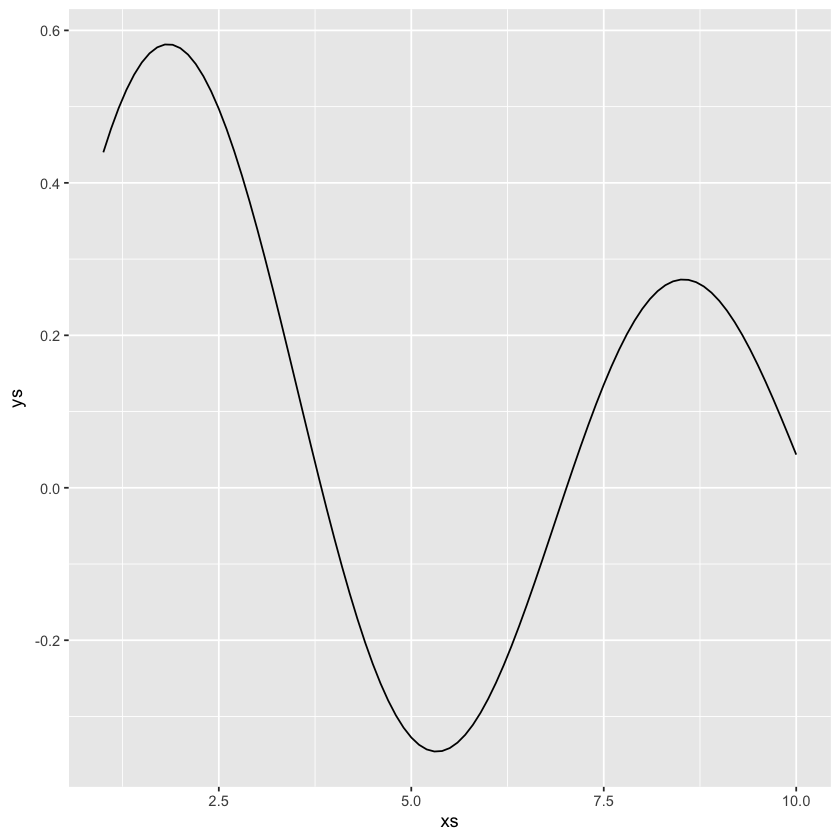

In [10]:
ggplot(data=f,aes(x=xs,y=ys))+geom_line()